In [87]:
import pandas as pd
import matplotlib.pyplot as plt

import torch

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# 1. CSV 파일에 접근

In [88]:
# CSV 파일에 접근
maml_norm_info = pd.read_csv('../MAML_filter64/MAML_filter64_inner_loop.csv')
arbiter_norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')

# 훈련 정보만 가지고 온다
maml_norm_info_train = maml_norm_info[maml_norm_info['phase']=='train']
arbiter_norm_info_train= arbiter_norm_info[arbiter_norm_info['phase']=='train']

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [89]:
arbiter_norm_info_train

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_grad_var,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,...,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_grad_var,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_weight_var,all_grads_var,all_grads_l2norm,all_weights_norm,all_weights_var
0,0,train,0,9.759704e-01,4.850597e-05,3.748490e+01,9.759704e-01,2.756903e-04,-0.000919,124.334770,...,1.035130e+00,2.678736e-01,-1.862645e-10,0.018479,0.010351,0.000027,0.000012,2.339282,20.008966,0.000866
1,0,train,1,9.664128e-01,-7.574637e-04,3.876104e+01,9.664128e-01,2.697456e-04,-0.000912,124.323196,...,1.021937e+00,2.610888e-01,-1.862645e-10,0.036694,0.020570,0.000106,0.000012,2.328754,20.008968,0.000866
2,0,train,2,9.522593e-01,-3.232700e-04,3.969857e+01,9.522593e-01,2.623550e-04,-0.000908,124.312698,...,1.016908e+00,2.585254e-01,0.000000e+00,0.054774,0.030734,0.000236,0.000012,2.319330,20.008978,0.000866
3,0,train,3,9.325212e-01,-1.753468e-03,3.929538e+01,9.325213e-01,2.486165e-04,-0.000891,124.299377,...,1.013922e+00,2.570096e-01,-3.725290e-10,0.072725,0.040858,0.000417,0.000012,2.307606,20.008997,0.000866
4,0,train,4,9.009876e-01,1.326203e-04,3.693723e+01,9.009876e-01,2.349400e-04,-0.000892,124.290497,...,1.012910e+00,2.564968e-01,-7.450581e-10,0.090492,0.050947,0.000649,0.000011,2.289332,20.009026,0.000866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203447,74999,train,0,7.273200e-10,4.946553e-13,2.786848e-08,7.273200e-10,1.528651e-22,-0.000607,141.936859,...,4.222319e-10,4.456994e-20,-2.466896e-03,0.025589,0.013919,0.000041,0.008018,60.884617,27.638075,0.001643
1203448,74999,train,1,6.079583e-10,-2.667781e-12,1.983164e-08,6.079583e-10,9.986013e-23,-0.000607,141.936859,...,5.063016e-10,6.408531e-20,-2.466896e-03,0.025589,0.013919,0.000041,0.008070,61.085552,27.644487,0.001644
1203449,74999,train,2,1.068346e-09,-4.625484e-12,3.417441e-08,1.068346e-09,3.089499e-22,-0.000607,141.936859,...,7.258787e-10,1.317250e-19,-2.466896e-03,0.025589,0.013919,0.000041,0.007641,59.444103,27.650192,0.001645
1203450,74999,train,3,3.664186e-09,-1.615340e-11,1.207170e-07,3.664186e-09,3.625029e-21,-0.000607,141.936859,...,1.692757e-09,7.163568e-19,-2.466896e-03,0.025589,0.013919,0.000041,0.006774,55.975174,27.655844,0.001646


# 2. MAML과 Arbiter의 Step 별 정보

In [90]:
maml_per_inner_loop_step = maml_norm_info.groupby('num_step').mean()
arbiter_per_inner_loop_step = arbiter_norm_info.groupby('num_step').mean()

# 3. MAML과 Arbiter의 Iteration 별 정보

In [91]:
maml_gr = maml_norm_info_train.groupby('current_iter').mean()
arbiter_gr = arbiter_norm_info_train.groupby('current_iter').mean()

# 4. Column 정보

In [107]:
 arbiter_gr.columns

Index(['num_step', 'layer_dict.conv0.conv.weight_alpha',
       'layer_dict.conv0.conv.weight_grad_mean',
       'layer_dict.conv0.conv.weight_grad_L1norm',
       'layer_dict.conv0.conv.weight_grad_L2norm',
       'layer_dict.conv0.conv.weight_grad_var',
       'layer_dict.conv0.conv.weight_weight_mean',
       'layer_dict.conv0.conv.weight_weight_L1norm',
       'layer_dict.conv0.conv.weight_weight_L2norm',
       'layer_dict.conv0.conv.weight_weight_var',
       'layer_dict.conv0.conv.bias_alpha',
       'layer_dict.conv0.conv.bias_grad_mean',
       'layer_dict.conv0.conv.bias_grad_L1norm',
       'layer_dict.conv0.conv.bias_grad_L2norm',
       'layer_dict.conv0.conv.bias_grad_var',
       'layer_dict.conv0.conv.bias_weight_mean',
       'layer_dict.conv0.conv.bias_weight_L1norm',
       'layer_dict.conv0.conv.bias_weight_L2norm',
       'layer_dict.conv0.conv.bias_weight_var',
       'layer_dict.conv1.conv.weight_alpha',
       'layer_dict.conv1.conv.weight_grad_mean',
       'la

# 5. Gradient Variance

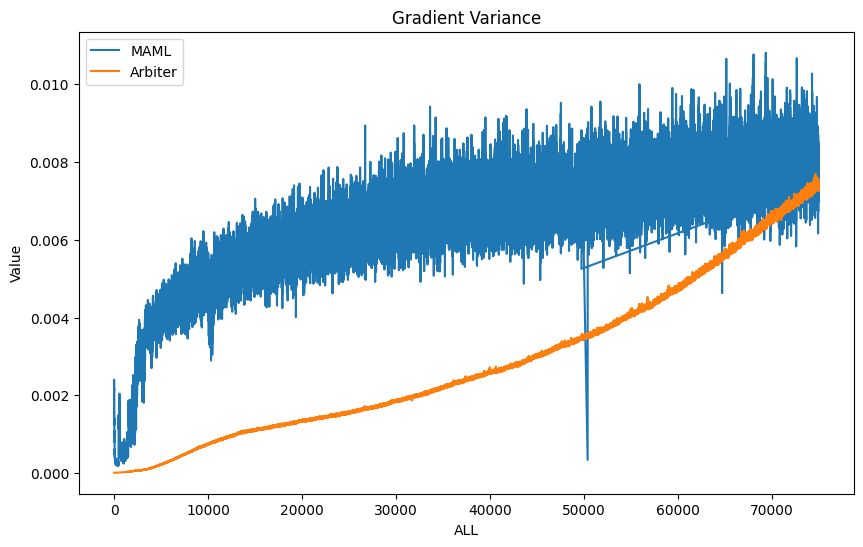

In [94]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_grads_var'], label='MAML')
plt.plot(arbiter_gr['all_grads_var'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

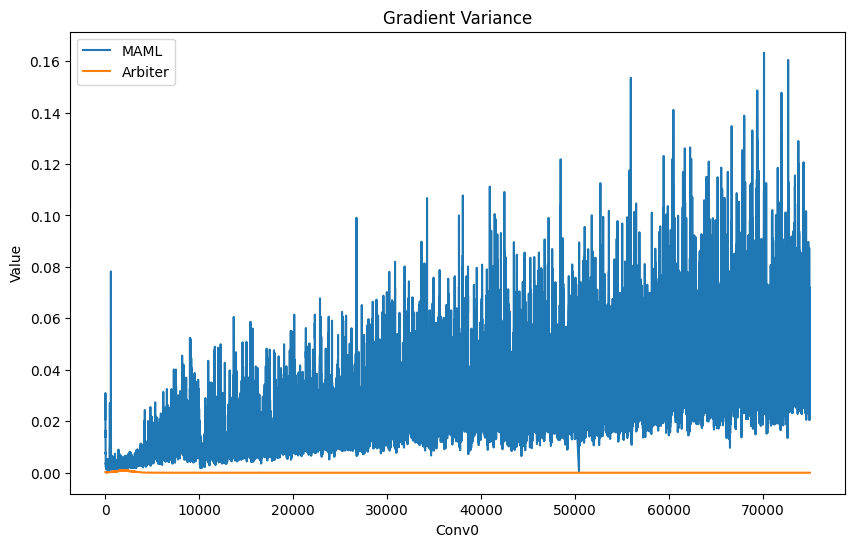

In [93]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv0.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv0.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

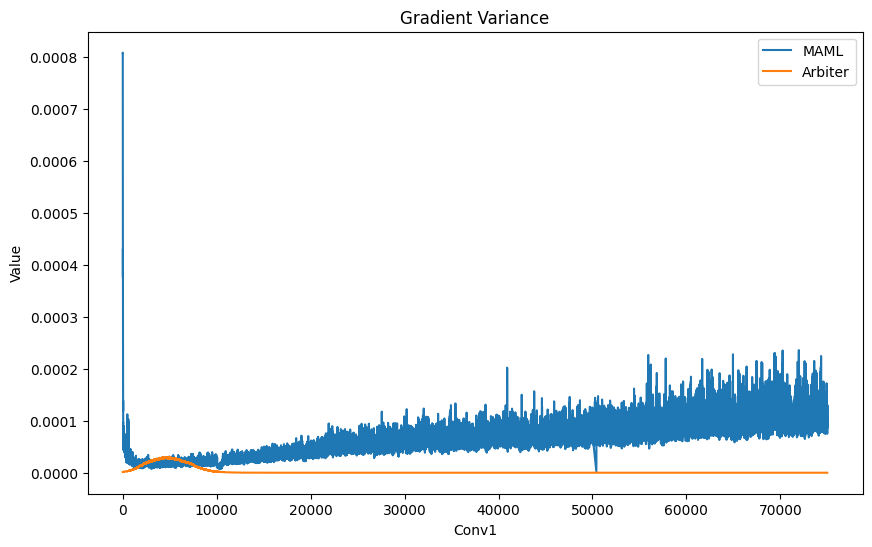

In [95]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

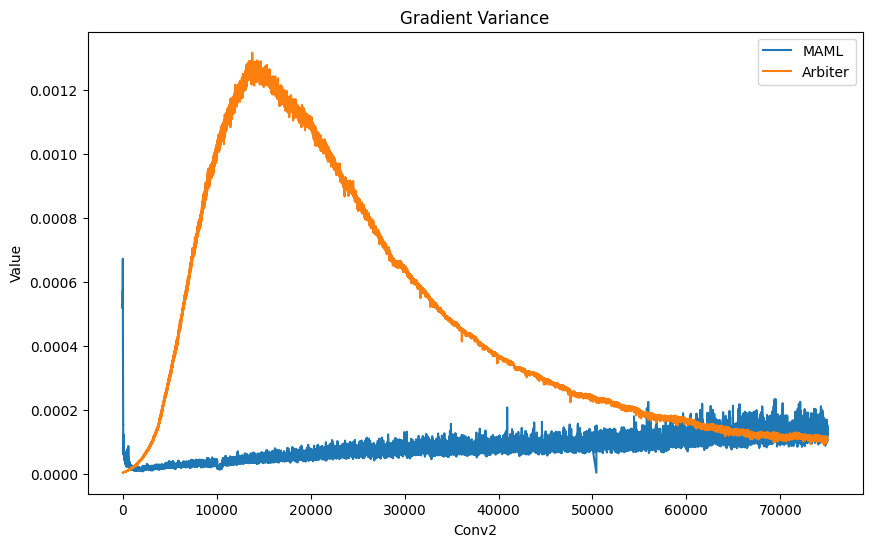

In [96]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv2.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv2.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv2')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

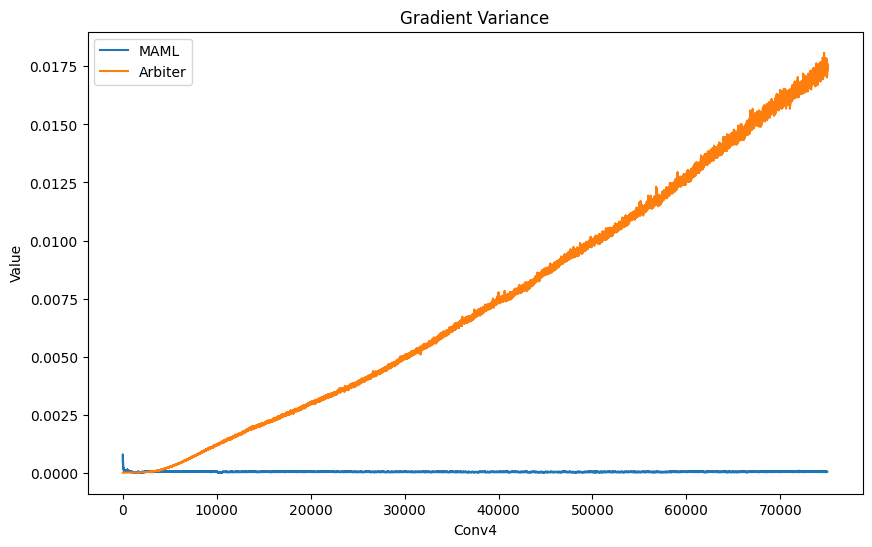

In [97]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.weight_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.weight_grad_var'],label='Arbiter')

plt.xlabel('Conv4')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

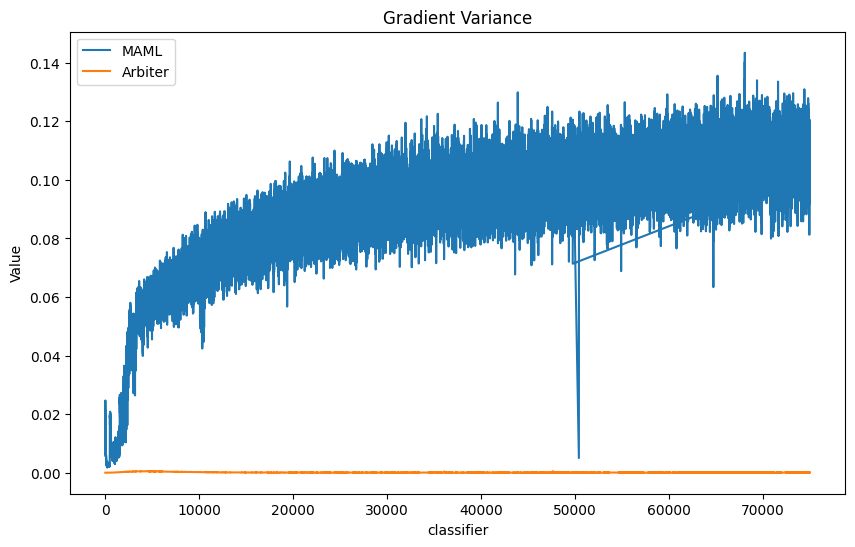

In [98]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_grad_var'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_grad_var'],label='Arbiter')

plt.xlabel('classifier')
plt.ylabel('Value')
plt.title('Gradient Variance')
plt.legend()

# 6. Weight L2 Norm

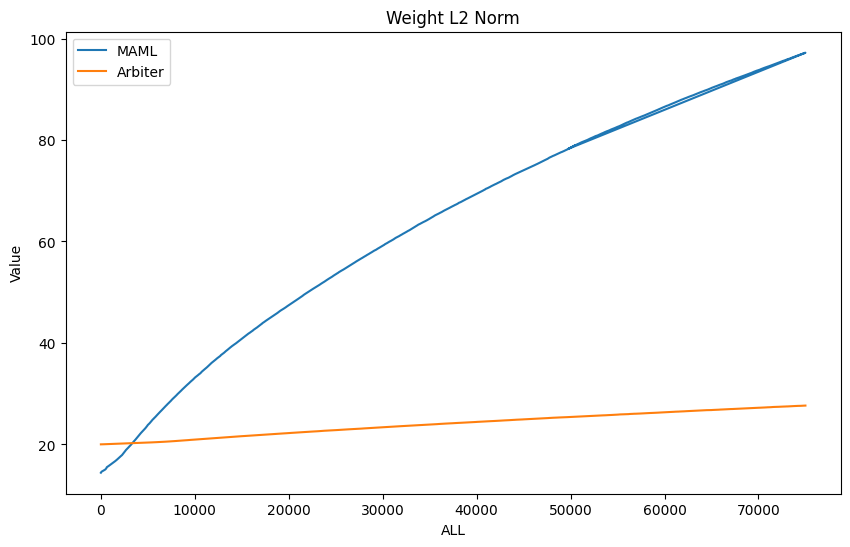

In [99]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_weights_norm'], label='MAML')
plt.plot(arbiter_gr['all_weights_norm'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Weight L2 Norm')
plt.legend()

# 7. Weight Variance

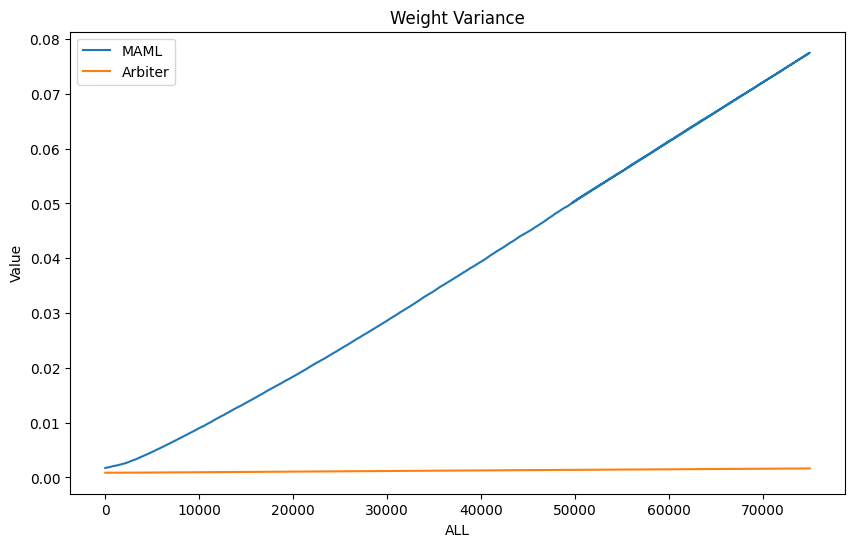

In [100]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_weights_var'], label='MAML')
plt.plot(arbiter_gr['all_weights_var'],label='Arbiter')

plt.xlabel('ALL')
plt.ylabel('Value')
plt.title('Weight Variance')
plt.legend()

# 8. Gradient Mean

In [106]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['all_grads_mean'], label='MAML')
plt.plot(arbiter_gr['all_grads_mean'],label='Arbiter')

plt.xlabel('Conv0')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

KeyError: 'all_grads_mean'

<Figure size 1000x600 with 0 Axes>

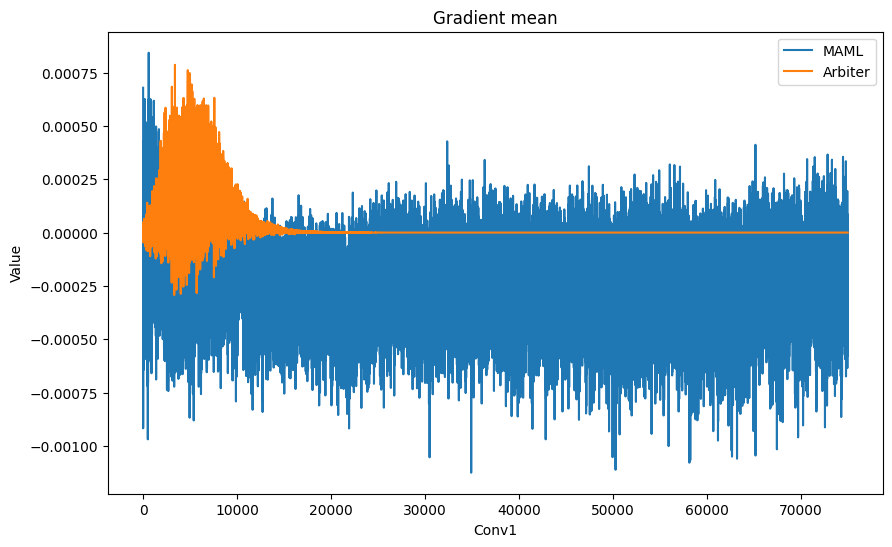

In [102]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv1.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv1.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv1')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

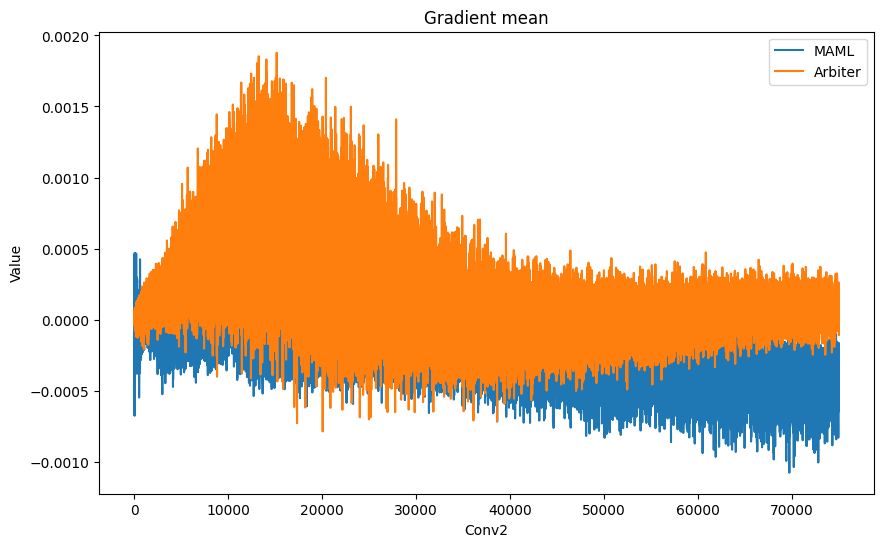

In [103]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv2.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv2.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv2')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

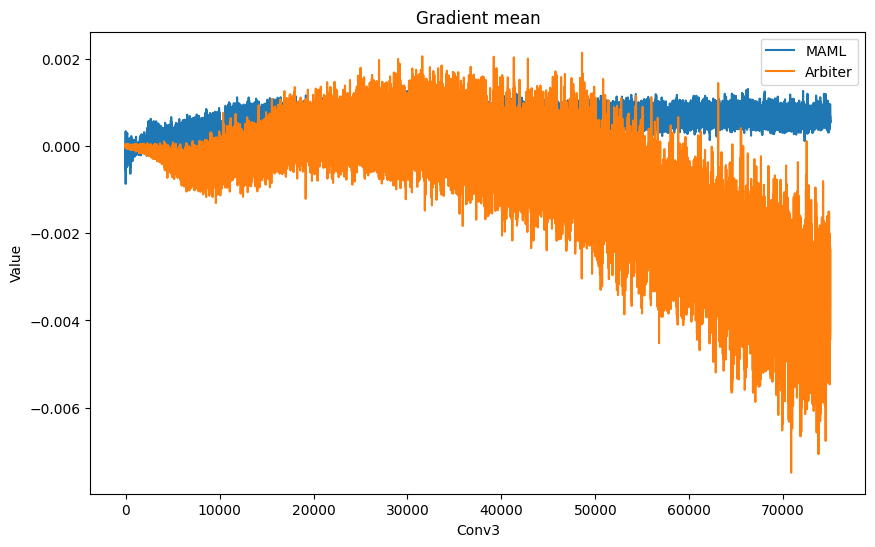

In [104]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.conv3.conv.weight_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.conv3.conv.weight_grad_mean'],label='Arbiter')

plt.xlabel('Conv3')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()

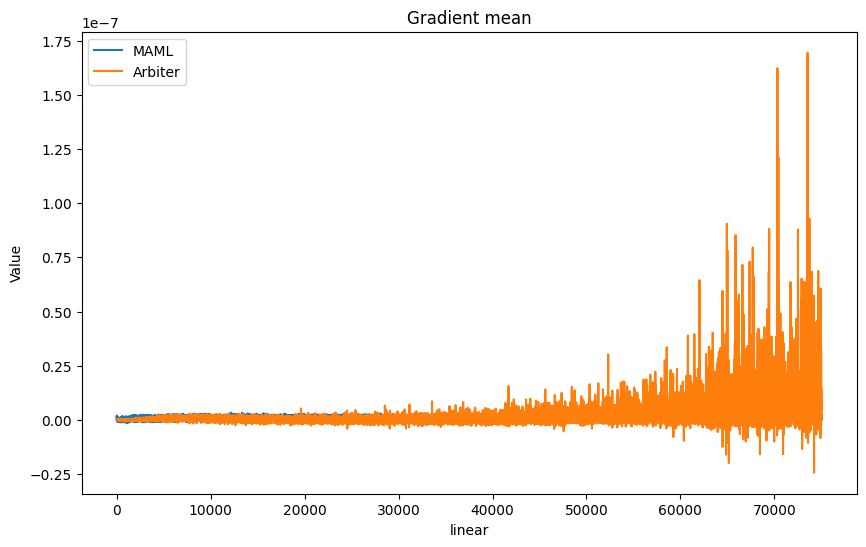

In [105]:
# 그래프 그리기
plt.figure(figsize=(10, 6))

plt.plot(maml_gr['layer_dict.linear.weights_grad_mean'], label='MAML')
plt.plot(arbiter_gr['layer_dict.linear.weights_grad_mean'],label='Arbiter')

plt.xlabel('linear')
plt.ylabel('Value')
plt.title('Gradient mean')
plt.legend()